In [1]:
#Import libraries

import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
import seaborn as sns

In [2]:
#Load dataset
iris = datasets.load_iris()
df = pd.DataFrame(data=iris.data, columns=iris.feature_names) # convert breast cancer data to Dataframe
df["target"]=iris.target

In [3]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [4]:
df.dtypes

sepal length (cm)    float64
sepal width (cm)     float64
petal length (cm)    float64
petal width (cm)     float64
target                 int32
dtype: object

In [5]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [6]:
df.target.value_counts()

0    50
1    50
2    50
Name: target, dtype: int64

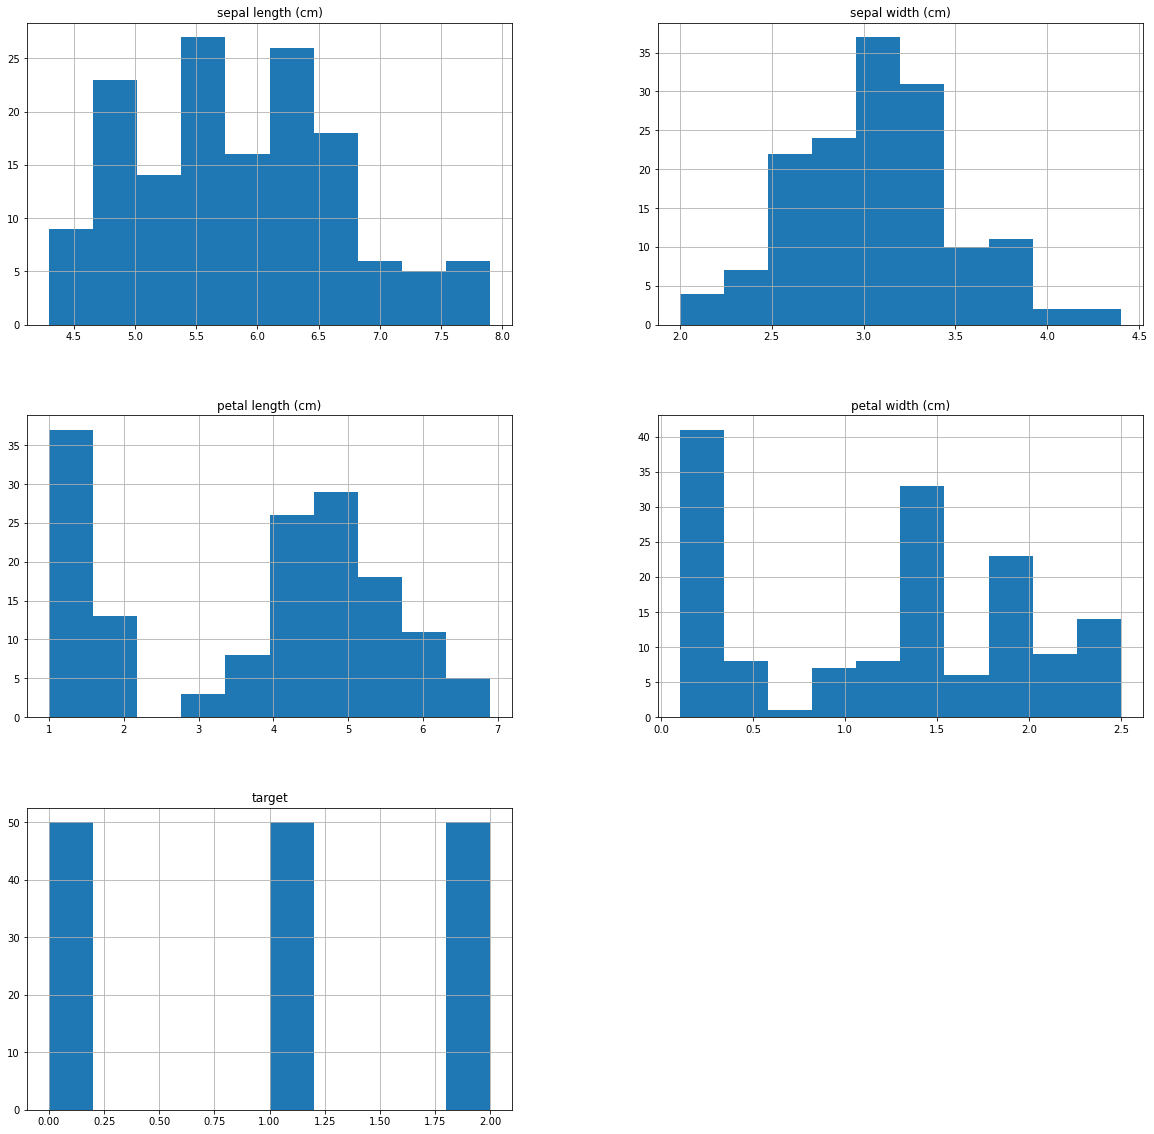

In [7]:
plt.rcParams["figure.figsize"] = (20,20)
df.hist()
plt.show()

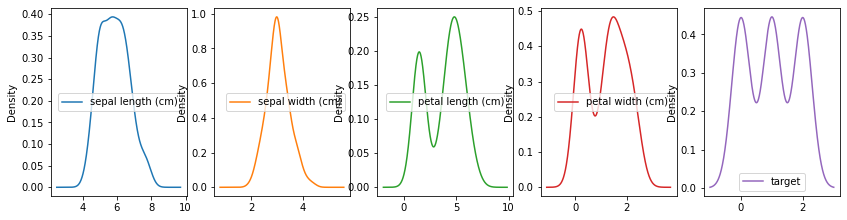

In [8]:
df.plot(kind='density', subplots=True, layout=(5,7), sharex=False)
plt.show()

In [9]:
df.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
target               0
dtype: int64

In [10]:
df.isna().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
target               0
dtype: int64

In [11]:
duplicate_values = df[df.duplicated()]
duplicate_values

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
142,5.8,2.7,5.1,1.9,2


In [12]:
df.drop_duplicates(keep='first', inplace=True)

In [13]:
duplicate_values = df[df.duplicated()]
duplicate_values

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target


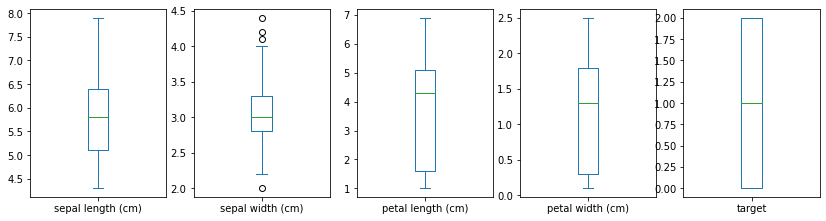

In [14]:
df.plot(kind='box', subplots=True, layout=(5,7), sharex=False, sharey=False)
plt.show()

In [15]:
correlation = df.corr(method='spearman')
columns = correlation.nlargest(5,'target').index
columns

Index(['target', 'petal width (cm)', 'petal length (cm)', 'sepal length (cm)',
       'sepal width (cm)'],
      dtype='object')

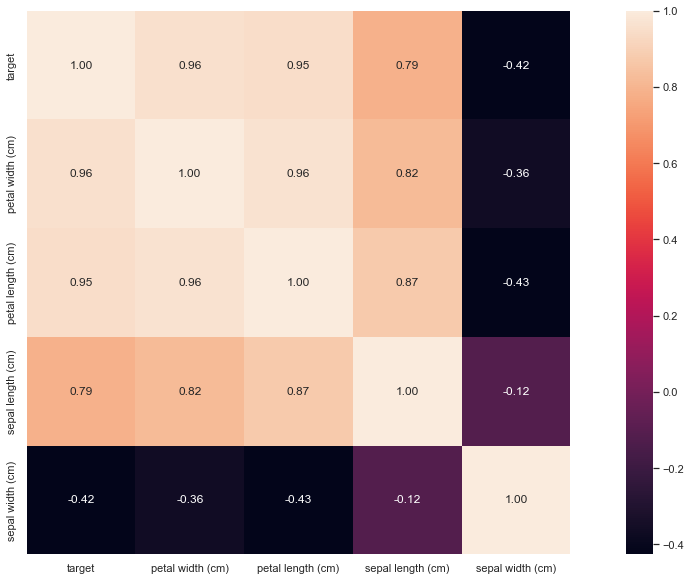

In [16]:
f = plt.figure(figsize=(20, 10))
correlation_map = np.corrcoef(df[columns].values.T)
sns.set(font_scale=1.0)
heatmap = sns.heatmap(correlation_map, cbar=True, annot=True, square=True, fmt='.2f', yticklabels=columns.values, xticklabels=columns.values)

plt.show()

##### Seperate dataset into features and output 

In [17]:
values = df.values

X = values[:,0:4]
Y = values[:,4]

##### Feature Scaling 

In [18]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler() # initialize scaler 
scaler.fit(X) # learn the necessary info from data 
X_scaled  = scaler.fit_transform(X) # apply scaling 

In [19]:
df_scaled = pd.DataFrame(X_scaled)

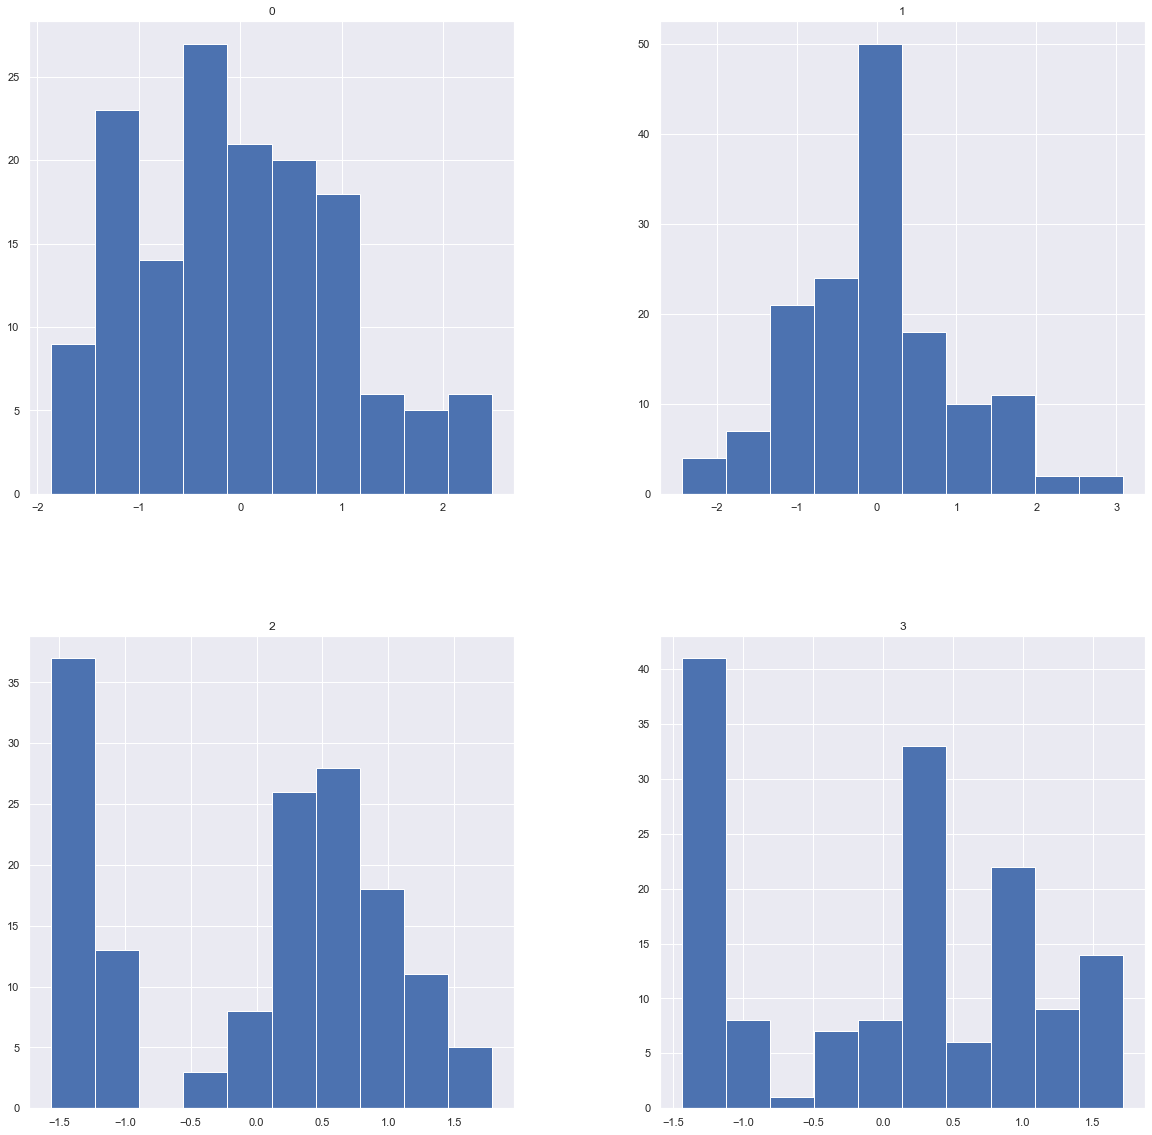

In [20]:
plt.rcParams["figure.figsize"] = (20,20)
df_scaled.hist()
plt.show()

In [21]:
#Evaluation metric for 13 algorithms

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis # LDA
from sklearn.neighbors import KNeighborsClassifier #KNN
from sklearn.naive_bayes import GaussianNB  # Naive Bayes
from sklearn.tree import DecisionTreeClassifier # Decision Tree
from sklearn.svm import SVC # SVM
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
import xgboost as xgb
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neural_network import MLPClassifier 
from sklearn.metrics import f1_score # We choose f1 score because the data are unbalanced and f1 takes the combination of precision and recall



models = []
models.append(('LR',  LogisticRegression(solver='liblinear')))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('kNN', KNeighborsClassifier()))
models.append(('DT',  DecisionTreeClassifier()))
models.append(('NB',  GaussianNB()))
models.append(('SVM', SVC(kernel="linear", gamma='auto')))
models.append(('RF',  RandomForestClassifier()))
models.append(('GB',  GradientBoostingClassifier()))
models.append(('XGB', xgb.XGBClassifier()))
models.append(('AdaBoost',  AdaBoostClassifier()))
models.append(('ANN', MLPClassifier()))


cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=5, random_state=1)
scoring = "f1_macro"

results_no_noise={}

results = []
names   = []
for i, model in models:
    cv_results = cross_val_score(model, X_scaled, Y, cv=cv, n_jobs=-1, scoring=scoring)
    results.append(cv_results)
    names.append(i)
    print("%03s: %f (+/- %f)" % (i, cv_results.mean(), cv_results.std()))
    results_no_noise[i]=cv_results.mean()

 LR: 0.908008 (+/- 0.075431)
LDA: 0.979690 (+/- 0.033781)
kNN: 0.955421 (+/- 0.047810)
 DT: 0.952593 (+/- 0.052633)
 NB: 0.953859 (+/- 0.053100)
SVM: 0.960176 (+/- 0.051577)
 RF: 0.953940 (+/- 0.047553)
 GB: 0.952425 (+/- 0.051175)
XGB: 0.953590 (+/- 0.045997)
AdaBoost: 0.945580 (+/- 0.054301)
ANN: 0.945839 (+/- 0.048615)


In [22]:
# Multiple results from cross validation for statistical tests

In [23]:
# Create a function that assembles cross validation results

def cv_res (results):  
    
    a = [5,10,15,20,25,30,35,40,45,50]

    x = []

    sum = 0

    for i , result in enumerate(results):
       
        sum += result

        if i+1 in a: 
            x.append(sum/5)
            sum=0
    return x

In [24]:
m =[]
for i in models:
    m.append(i[0])

f1_results = pd.DataFrame()


for i, m in enumerate(m):
    f1_results[str(m)] = cv_res(results[i])

f1_results    

,LR,LDA,kNN,DT,NB,SVM,RF,GB,XGB,AdaBoost,ANN
0,0.946263,0.986532,0.973064,0.973064,0.986532,0.958754,0.973064,0.973064,0.973064,0.973064,0.945286
1,0.890909,0.971717,0.959596,0.944781,0.931582,0.958249,0.944781,0.930471,0.944781,0.930471,0.944781
2,0.932660,0.973333,0.933199,0.959865,0.946397,0.946128,0.933199,0.959865,0.959865,0.946397,0.933199
3,0.885640,0.986532,0.944012,0.957749,0.956638,0.957480,0.970948,0.957749,0.944281,0.957749,0.943170
4,0.906162,0.986532,0.959865,0.932929,0.946128,0.986532,0.946397,0.945556,0.945556,0.932088,0.947138
5,0.903805,0.973064,0.946397,0.959596,0.959865,0.958754,0.946397,0.946397,0.959596,0.946397,0.959596
6,0.905892,0.973064,0.959596,0.946128,0.959596,0.945286,0.946128,0.946128,0.946128,0.931818,0.933670
7,0.902660,0.986532,0.973333,0.946667,0.946128,0.973064,0.959865,0.959865,0.957480,0.946128,0.959865
8,0.945286,0.986532,0.973064,0.959596,0.973064,0.944444,0.973064,0.959596,0.959596,0.959596,0.973064
9,0.860808,0.973064,0.932088,0.945556,0.932660,0.973064,0.945556,0.945556,0.945556,0.932088,0.918620


In [25]:
# Initial results without the AdaBoost algorithm
f1_results_other_algorithms=f1_results.drop(columns=['AdaBoost']).mean(axis=1)
f1_results_other_algorithms

0    0.968869
1    0.942165
2    0.947771
3    0.950420
4    0.950279
5    0.951347
6    0.946162
7    0.956546
8    0.964731
9    0.937253
dtype: float64

## Noise without noisify 

In [26]:
# Create a function to add noise    
def add_noise(X,p):
    if p>0:
        X_n = pd.DataFrame(X)
        a,b = X.shape
        c = round(a*p)

        for k in range(b):
            mean = X_n[k].mean()
            sd = X_n[k].std()

            for i in range(0,a,int(a/c)):
                X_n.iloc[i,k] = np.random.normal(mean,sd)

        return X_n.values

    else:
        return X

#### Add noise 5%

In [27]:
X2_noise1 = add_noise(X_scaled, p=0.05)

In [28]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis # LDA
from sklearn.neighbors import KNeighborsClassifier #KNN
from sklearn.naive_bayes import GaussianNB  # Naive Bayes
from sklearn.tree import DecisionTreeClassifier # Decision Tree
from sklearn.svm import SVC # SVM
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
import xgboost as xgb
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neural_network import MLPClassifier 
from sklearn.metrics import f1_score # We choose f1 score because the data are unbalanced and f1 takes the combination of precision and recall



models = []
models.append(('LR',  LogisticRegression(solver='liblinear')))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('kNN', KNeighborsClassifier()))
models.append(('DT',  DecisionTreeClassifier()))
models.append(('NB',  GaussianNB()))
models.append(('SVM', SVC(kernel="linear", gamma='auto')))
models.append(('RF',  RandomForestClassifier()))
models.append(('GB',  GradientBoostingClassifier()))
models.append(('XGB', xgb.XGBClassifier()))
models.append(('AdaBoost',  AdaBoostClassifier()))
models.append(('ANN', MLPClassifier()))


cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=5, random_state=1)
scoring = "f1_macro"


results_noise2_1={}

results = []
names   = []
for i, model in models:
    cv_results = cross_val_score(model, X2_noise1, Y, cv=cv, n_jobs=-1, scoring=scoring)
    results.append(cv_results)
    names.append(i)
    print("%03s: %f (+/- %f)" % (i, cv_results.mean(), cv_results.std()))
    results_noise2_1[i]=cv_results.mean()

 LR: 0.861802 (+/- 0.095837)
LDA: 0.958283 (+/- 0.042084)
kNN: 0.915051 (+/- 0.063479)
 DT: 0.919608 (+/- 0.078031)
 NB: 0.904581 (+/- 0.067575)
SVM: 0.943212 (+/- 0.051228)
 RF: 0.931887 (+/- 0.056519)
 GB: 0.929390 (+/- 0.067694)
XGB: 0.928949 (+/- 0.060986)
AdaBoost: 0.891964 (+/- 0.061559)
ANN: 0.910889 (+/- 0.064483)


In [29]:
m =[]
for i in models:
    m.append(i[0])

f1_results_noise_1 = pd.DataFrame()


for i, m in enumerate(m):
    f1_results_noise_1[str(m)] = cv_res(results[i])

f1_results_noise_1

,LR,LDA,kNN,DT,NB,SVM,RF,GB,XGB,AdaBoost,ANN
0,0.907475,0.959596,0.932929,0.959865,0.933064,0.946397,0.959865,0.946128,0.959865,0.905993,0.906734
1,0.821515,0.959259,0.918021,0.932795,0.905592,0.932323,0.919125,0.918790,0.905592,0.849351,0.879630
2,0.888552,0.959596,0.907003,0.917980,0.919596,0.946397,0.946397,0.946397,0.946397,0.919731,0.917980
3,0.828693,0.959865,0.905156,0.917345,0.900976,0.946667,0.929596,0.930544,0.902660,0.890137,0.903877
4,0.892694,0.959596,0.906902,0.932929,0.920202,0.946128,0.945556,0.919461,0.945556,0.877643,0.920673
5,0.848586,0.946397,0.919731,0.878114,0.905152,0.932088,0.906263,0.919731,0.919461,0.919461,0.906128
6,0.878956,0.959596,0.946128,0.931818,0.918350,0.946128,0.918350,0.931818,0.931818,0.863740,0.920202
7,0.815876,0.959596,0.890577,0.904512,0.863906,0.945286,0.945286,0.932088,0.929702,0.885859,0.918687
8,0.913788,0.986532,0.959865,0.944276,0.959596,0.972222,0.973064,0.945286,0.959596,0.931818,0.943434
9,0.821886,0.932795,0.864195,0.876445,0.819375,0.918485,0.875371,0.903653,0.888839,0.875909,0.891549


In [30]:
# Results with noise 5% without the AdaBoost algorithm
f1_results_noise_1_other_algorithms=f1_results_noise_1.drop(columns=['AdaBoost']).mean(axis=1)
f1_results_noise_1_other_algorithms

0    0.941192
1    0.909264
2    0.929630
3    0.912538
4    0.928970
5    0.908165
6    0.928316
7    0.910551
8    0.955766
9    0.879259
dtype: float64

#### Add noise 10%

In [31]:
X2_noise2 = add_noise(X_scaled,p=.1)

In [32]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis # LDA
from sklearn.neighbors import KNeighborsClassifier #KNN
from sklearn.naive_bayes import GaussianNB  # Naive Bayes
from sklearn.tree import DecisionTreeClassifier # Decision Tree
from sklearn.svm import SVC # SVM
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
import xgboost as xgb
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neural_network import MLPClassifier 
from sklearn.metrics import f1_score # We choose f1 score because the data are unbalanced and f1 takes the combination of precision and recall



models = []
models.append(('LR',  LogisticRegression(solver='liblinear')))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('kNN', KNeighborsClassifier()))
models.append(('DT',  DecisionTreeClassifier()))
models.append(('NB',  GaussianNB()))
models.append(('SVM', SVC(kernel="linear", gamma='auto')))
models.append(('RF',  RandomForestClassifier()))
models.append(('GB',  GradientBoostingClassifier()))
models.append(('XGB', xgb.XGBClassifier()))
models.append(('AdaBoost',  AdaBoostClassifier()))
models.append(('ANN', MLPClassifier()))


cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=5, random_state=1)
scoring = "f1_macro"


results_noise2_2={}

results = []
names   = []
for i, model in models:
    cv_results = cross_val_score(model, X2_noise2, Y, cv=cv, n_jobs=-1, scoring=scoring)
    results.append(cv_results)
    names.append(i)
    print("%03s: %f (+/- %f)" % (i, cv_results.mean(), cv_results.std()))
    results_noise2_2[i]=cv_results.mean()

 LR: 0.779315 (+/- 0.099462)
LDA: 0.843537 (+/- 0.085684)
kNN: 0.876830 (+/- 0.081073)
 DT: 0.815470 (+/- 0.095104)
 NB: 0.819435 (+/- 0.078099)
SVM: 0.883317 (+/- 0.078905)
 RF: 0.842310 (+/- 0.085230)
 GB: 0.842321 (+/- 0.090837)
XGB: 0.854036 (+/- 0.078838)
AdaBoost: 0.715913 (+/- 0.134109)
ANN: 0.858710 (+/- 0.085531)


In [33]:
m =[]
for i in models:
    m.append(i[0])

f1_results_noise_2 = pd.DataFrame()


for i, m in enumerate(m):
    f1_results_noise_2[str(m)] = cv_res(results[i])

f1_results_noise_2

,LR,LDA,kNN,DT,NB,SVM,RF,GB,XGB,AdaBoost,ANN
0,0.771212,0.837576,0.862472,0.822506,0.811518,0.875065,0.809307,0.834964,0.837121,0.695236,0.848264
1,0.773686,0.820034,0.903911,0.790606,0.832391,0.889697,0.862391,0.835219,0.847357,0.799267,0.850269
2,0.788754,0.800000,0.826869,0.812020,0.812138,0.841313,0.827980,0.814343,0.853737,0.635349,0.829091
3,0.764377,0.905051,0.917345,0.874954,0.844663,0.931582,0.888620,0.863338,0.862256,0.674562,0.889596
4,0.826061,0.865087,0.864716,0.760655,0.796268,0.892494,0.826299,0.837609,0.839262,0.674127,0.852629
5,0.759981,0.848552,0.892525,0.837576,0.835589,0.879327,0.852256,0.852256,0.876633,0.791970,0.890976
6,0.783255,0.813673,0.840609,0.787973,0.824248,0.852258,0.813170,0.825339,0.851888,0.671328,0.823743
7,0.798562,0.848889,0.905828,0.819057,0.796431,0.906162,0.846498,0.861501,0.847138,0.684207,0.920137
8,0.815273,0.874089,0.931448,0.853035,0.890337,0.918620,0.904646,0.905017,0.917475,0.791656,0.874089
9,0.711987,0.822424,0.822579,0.796313,0.750771,0.846650,0.791936,0.793620,0.807492,0.741431,0.808302


In [34]:
## Results with noise 10% without the AdaBoost algorithm
f1_results_noise_2_other_algorithms=f1_results_noise_2.drop(columns=['AdaBoost']).mean(axis=1)
f1_results_noise_2_other_algorithms

0    0.831001
1    0.840556
2    0.820625
3    0.874178
4    0.836108
5    0.852567
6    0.821615
7    0.855020
8    0.888403
9    0.795207
dtype: float64

#### Add noise 15%

In [35]:
X2_noise3 = add_noise(X_scaled,p=.15)

In [36]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis # LDA
from sklearn.neighbors import KNeighborsClassifier #KNN
from sklearn.naive_bayes import GaussianNB  # Naive Bayes
from sklearn.tree import DecisionTreeClassifier # Decision Tree
from sklearn.svm import SVC # SVM
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
import xgboost as xgb
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neural_network import MLPClassifier 
from sklearn.metrics import f1_score # We choose f1 score because the data are unbalanced and f1 takes the combination of precision and recall



models = []
models.append(('LR',  LogisticRegression(solver='liblinear')))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('kNN', KNeighborsClassifier()))
models.append(('DT',  DecisionTreeClassifier()))
models.append(('NB',  GaussianNB()))
models.append(('SVM', SVC(kernel="linear", gamma='auto')))
models.append(('RF',  RandomForestClassifier()))
models.append(('GB',  GradientBoostingClassifier()))
models.append(('XGB', xgb.XGBClassifier()))
models.append(('AdaBoost',  AdaBoostClassifier()))
models.append(('ANN', MLPClassifier()))


cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=5, random_state=1)
scoring = "f1_macro"


results_noise2_3={}

results = []
names   = []
for i, model in models:
    cv_results = cross_val_score(model, X2_noise3, Y, cv=cv, n_jobs=-1, scoring=scoring)
    results.append(cv_results)
    names.append(i)
    print("%03s: %f (+/- %f)" % (i, cv_results.mean(), cv_results.std()))
    results_noise2_3[i]=cv_results.mean()

 LR: 0.689188 (+/- 0.112202)
LDA: 0.734498 (+/- 0.103757)
kNN: 0.776026 (+/- 0.096399)
 DT: 0.736691 (+/- 0.102430)
 NB: 0.744052 (+/- 0.093468)
SVM: 0.792422 (+/- 0.095038)
 RF: 0.749289 (+/- 0.102653)
 GB: 0.733506 (+/- 0.107961)
XGB: 0.756584 (+/- 0.108400)
AdaBoost: 0.735820 (+/- 0.110014)
ANN: 0.780995 (+/- 0.099233)


In [37]:
m =[]
for i in models:
    m.append(i[0])

f1_results_noise_3 = pd.DataFrame()


for i, m in enumerate(m):
    f1_results_noise_3[str(m)] = cv_res(results[i])

f1_results_noise_3

,LR,LDA,kNN,DT,NB,SVM,RF,GB,XGB,AdaBoost,ANN
0,0.711147,0.755047,0.769476,0.739895,0.770337,0.809678,0.740101,0.729394,0.748716,0.672642,0.792203
1,0.663982,0.701380,0.795934,0.718337,0.732821,0.784613,0.740857,0.685281,0.756333,0.753179,0.781621
2,0.741515,0.750067,0.760453,0.703384,0.760875,0.751145,0.732929,0.695623,0.695556,0.708384,0.753434
3,0.632627,0.723450,0.790334,0.801684,0.749559,0.815382,0.792997,0.782488,0.803665,0.787179,0.777250
4,0.729693,0.787585,0.813789,0.736660,0.765811,0.810243,0.753718,0.719808,0.779495,0.710243,0.826446
5,0.647475,0.713872,0.741077,0.729529,0.753045,0.773199,0.727946,0.742559,0.743704,0.729966,0.785589
6,0.690588,0.720471,0.735267,0.718582,0.738786,0.759158,0.741296,0.715258,0.717054,0.693804,0.730725
7,0.652329,0.708312,0.823172,0.757821,0.681732,0.810289,0.733353,0.761936,0.777862,0.758663,0.794627
8,0.769693,0.782876,0.813030,0.737027,0.826970,0.824343,0.777398,0.762102,0.777795,0.795960,0.824343
9,0.652836,0.701922,0.717725,0.723993,0.660587,0.786167,0.752290,0.740609,0.765657,0.748184,0.743709


In [38]:
## Results with noise 15% without the AdaBoost algorithm
f1_results_noise_3_other_algorithms=f1_results_noise_3.drop(columns=['AdaBoost']).mean(axis=1)
f1_results_noise_3_other_algorithms

0    0.756599
1    0.736116
2    0.734498
3    0.766944
4    0.772325
5    0.735799
6    0.726719
7    0.750143
8    0.789558
9    0.724549
dtype: float64

#### Add noise 20%

In [39]:
X2_noise4 = add_noise(X_scaled,p=.2)

In [40]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis # LDA
from sklearn.neighbors import KNeighborsClassifier #KNN
from sklearn.naive_bayes import GaussianNB  # Naive Bayes
from sklearn.tree import DecisionTreeClassifier # Decision Tree
from sklearn.svm import SVC # SVM
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
import xgboost as xgb
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neural_network import MLPClassifier 
from sklearn.metrics import f1_score # We choose f1 score because the data are unbalanced and f1 takes the combination of precision and recall



models = []
models.append(('LR',  LogisticRegression(solver='liblinear')))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('kNN', KNeighborsClassifier()))
models.append(('DT',  DecisionTreeClassifier()))
models.append(('NB',  GaussianNB()))
models.append(('SVM', SVC(kernel="linear", gamma='auto')))
models.append(('RF',  RandomForestClassifier()))
models.append(('GB',  GradientBoostingClassifier()))
models.append(('XGB', xgb.XGBClassifier()))
models.append(('AdaBoost',  AdaBoostClassifier()))
models.append(('ANN', MLPClassifier()))


cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=5, random_state=1)
scoring = "f1_macro"


results_noise2_4={}

results = []
names   = []
for i, model in models:
    cv_results = cross_val_score(model, X2_noise4, Y, cv=cv, n_jobs=-1, scoring=scoring)
    results.append(cv_results)
    names.append(i)
    print("%03s: %f (+/- %f)" % (i, cv_results.mean(), cv_results.std()))
    results_noise2_4[i]=cv_results.mean()

 LR: 0.566953 (+/- 0.151629)
LDA: 0.578421 (+/- 0.140173)
kNN: 0.639960 (+/- 0.116441)
 DT: 0.563548 (+/- 0.115289)
 NB: 0.622775 (+/- 0.100062)
SVM: 0.613557 (+/- 0.128115)
 RF: 0.638716 (+/- 0.121727)
 GB: 0.622881 (+/- 0.110573)
XGB: 0.647361 (+/- 0.121410)
AdaBoost: 0.608401 (+/- 0.131388)
ANN: 0.640831 (+/- 0.113732)


In [41]:
m =[]
for i in models:
    m.append(i[0])

f1_results_noise_4 = pd.DataFrame()


for i, m in enumerate(m):
    f1_results_noise_4[str(m)] = cv_res(results[i])

f1_results_noise_4

,LR,LDA,kNN,DT,NB,SVM,RF,GB,XGB,AdaBoost,ANN
0,0.639394,0.624089,0.587104,0.542124,0.622997,0.636410,0.593963,0.594341,0.605907,0.611207,0.621753
1,0.556008,0.575605,0.686718,0.526582,0.610202,0.616783,0.652764,0.612944,0.666535,0.618004,0.709173
2,0.646427,0.643920,0.669926,0.569896,0.661949,0.669408,0.639562,0.653300,0.612189,0.578563,0.702133
3,0.453492,0.496017,0.618403,0.561395,0.586522,0.572323,0.646335,0.607896,0.661366,0.644040,0.554988
4,0.652395,0.650861,0.687915,0.553351,0.665671,0.663790,0.654587,0.657079,0.723754,0.597489,0.682287
5,0.543232,0.543639,0.586326,0.613923,0.606563,0.542516,0.625993,0.629947,0.624257,0.588701,0.621145
6,0.492037,0.498316,0.626610,0.559418,0.629048,0.570226,0.639797,0.626490,0.615960,0.580856,0.616671
7,0.557335,0.622559,0.685363,0.565722,0.595303,0.649804,0.650824,0.631143,0.661818,0.656287,0.643651
8,0.582405,0.582405,0.687157,0.600793,0.672792,0.637374,0.713278,0.668576,0.714495,0.585830,0.672434
9,0.546801,0.546801,0.564075,0.542278,0.576700,0.576936,0.570058,0.547095,0.587330,0.623036,0.584074


In [42]:
## Results with noise 20% without the AdaBoost algorithm
f1_results_noise_4_other_algorithms=f1_results_noise_4.drop(columns=['AdaBoost']).mean(axis=1)
f1_results_noise_4_other_algorithms

0    0.606808
1    0.621331
2    0.646871
3    0.575874
4    0.659169
5    0.593754
6    0.587457
7    0.626352
8    0.653171
9    0.564215
dtype: float64

In [43]:
f1_consolidated_results2 = pd.DataFrame()
f1_consolidated_results2 = f1_consolidated_results2.append(results_no_noise, ignore_index=True)
f1_consolidated_results2 = f1_consolidated_results2.append(results_noise2_1, ignore_index=True)
f1_consolidated_results2 = f1_consolidated_results2.append(results_noise2_2, ignore_index=True)
f1_consolidated_results2 = f1_consolidated_results2.append(results_noise2_3, ignore_index=True)
f1_consolidated_results2 = f1_consolidated_results2.append(results_noise2_4, ignore_index=True)

In [44]:
new_column_values = ['Without Noise','Noise 5%','Noise 10%','Noise 15%','Noise 20%']

f1_consolidated_results2 ["Status"] = new_column_values 

f1_consolidated_results2 

,LR,LDA,kNN,DT,NB,SVM,RF,GB,XGB,AdaBoost,ANN,Status
0,0.908008,0.979690,0.955421,0.952593,0.953859,0.960176,0.953940,0.952425,0.953590,0.945580,0.945839,Without Noise
1,0.861802,0.958283,0.915051,0.919608,0.904581,0.943212,0.931887,0.929390,0.928949,0.891964,0.910889,Noise 5%
2,0.779315,0.843537,0.876830,0.815470,0.819435,0.883317,0.842310,0.842321,0.854036,0.715913,0.858710,Noise 10%
3,0.689188,0.734498,0.776026,0.736691,0.744052,0.792422,0.749289,0.733506,0.756584,0.735820,0.780995,Noise 15%
4,0.566953,0.578421,0.639960,0.563548,0.622775,0.613557,0.638716,0.622881,0.647361,0.608401,0.640831,Noise 20%


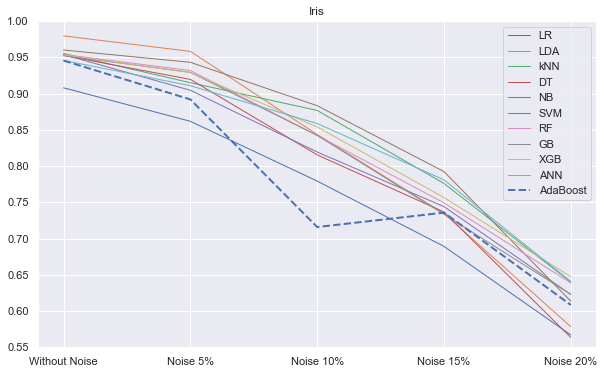

In [45]:
# Importing packages
import matplotlib.pyplot as plt

# Plot a simple line chart
fig, g = plt.subplots(figsize = (10,6))

sns.color_palette("rocket", as_cmap=True)
plt.plot(f1_consolidated_results2 ['Status'],f1_consolidated_results2.drop(columns=['Status','AdaBoost'],axis=1),linewidth=1)
plt.plot(f1_consolidated_results2 ['Status'],f1_consolidated_results2['AdaBoost'],'--',linewidth=2)
plt.legend(['LR','LDA','kNN','DT','NB','SVM','RF','GB','XGB','ANN', 'AdaBoost'])
#plt.legend(f1_consolidated_results2['AdaBoost']),loc="upper right")
plt.ylim(0.55,1)
plt.title("Iris")
plt.savefig('Iris.png', dpi = 300 ,transparent = True)
plt.show()

### T-test Statistic 

In [46]:
from scipy.stats import ttest_ind as ttest

Hypothesis

H0: Noise does not effect the models efficiency f1_no_noise = f1_noise

H1: There is effect of noise in the models efficiency f1_no_noise <> f1_noise

#### T-test for data without noise

In [47]:
t_value,p_value=ttest(f1_results['AdaBoost'],f1_results_other_algorithms)

print('Test statistic is %f'%float("{:.6f}".format(t_value)))

print('p-value for two tailed test is %f'%p_value)

alpha = 0.05
  
if p_value<=alpha:

    print('Since p-value(=%f)'%p_value,'<','alpha(=%.2f)'%alpha,'''We reject the null hypothesis H0. So we conclude that the effect of noise in models efficiency at %.2f level of significance.'''%alpha)

else:

    print('Since p-value(=%f)'%p_value,'>','alpha(=%.2f)'%alpha,'''We do not reject the null hypothesis H0. So we conclude that the effect of noise do not change the models efficiency at %.2f level of significance.''' %alpha)


Test statistic is -1.086647
p-value for two tailed test is 0.291531
Since p-value(=0.291531) > alpha(=0.05) We do not reject the null hypothesis H0. So we conclude that the effect of noise do not change the models efficiency at 0.05 level of significance.


### T-test for 5% noise

#### Compare with initial results

In [48]:
t_value,p_value=ttest(f1_results['AdaBoost'],f1_results_noise_1['AdaBoost'])

print('Test statistic is %f'%float("{:.6f}".format(t_value)))

print('p-value for two tailed test is %f'%p_value)

alpha = 0.05
  
if p_value<=alpha:

    print('Since p-value(=%f)'%p_value,'<','alpha(=%.2f)'%alpha,'''We reject the null hypothesis H0. So we conclude that the effect of noise in models efficiency at %.2f level of significance.'''%alpha)

else:

    print('Since p-value(=%f)'%p_value,'>','alpha(=%.2f)'%alpha,'''We do not reject the null hypothesis H0. So we conclude that the effect of noise do not change the models efficiency at %.2f level of significance.''' %alpha)


Test statistic is 5.579189
p-value for two tailed test is 0.000027
Since p-value(=0.000027) < alpha(=0.05) We reject the null hypothesis H0. So we conclude that the effect of noise in models efficiency at 0.05 level of significance.


#### Compare with other alforithms

In [49]:
t_value,p_value=ttest(f1_results_other_algorithms,f1_results_noise_1_other_algorithms)

print('Test statistic is %f'%float("{:.6f}".format(t_value)))

print('p-value for two tailed test is %f'%p_value)

alpha = 0.05
  
if p_value<=alpha:

    print('Since p-value(=%f)'%p_value,'<','alpha(=%.2f)'%alpha,'''We reject the null hypothesis H0. So we conclude that the effect of noise in models efficiency at %.2f level of significance.'''%alpha)

else:

    print('Since p-value(=%f)'%p_value,'>','alpha(=%.2f)'%alpha,'''We do not reject the null hypothesis H0. So we conclude that the effect of noise do not change the models efficiency at %.2f level of significance.''' %alpha)


Test statistic is 4.241322
p-value for two tailed test is 0.000491
Since p-value(=0.000491) < alpha(=0.05) We reject the null hypothesis H0. So we conclude that the effect of noise in models efficiency at 0.05 level of significance.


### T-test for 10% noise

#### Compare with initial results

In [50]:
t_value,p_value=ttest(f1_results['AdaBoost'],f1_results_noise_2['AdaBoost'])

print('Test statistic is %f'%float("{:.6f}".format(t_value)))

print('p-value for two tailed test is %f'%p_value)

alpha = 0.05
  
if p_value<=alpha:

    print('Since p-value(=%f)'%p_value,'<','alpha(=%.2f)'%alpha,'''We reject the null hypothesis H0. So we conclude that the effect of noise in models efficiency at %.2f level of significance.'''%alpha)

else:

    print('Since p-value(=%f)'%p_value,'>','alpha(=%.2f)'%alpha,'''We do not reject the null hypothesis H0. So we conclude that the effect of noise do not change the models efficiency at %.2f level of significance.''' %alpha)


Test statistic is 11.752280
p-value for two tailed test is 0.000000
Since p-value(=0.000000) < alpha(=0.05) We reject the null hypothesis H0. So we conclude that the effect of noise in models efficiency at 0.05 level of significance.


#### Compare with other algorithms

In [51]:
t_value,p_value=ttest(f1_results_other_algorithms,f1_results_noise_2_other_algorithms)

print('Test statistic is %f'%float("{:.6f}".format(t_value)))

print('p-value for two tailed test is %f'%p_value)

alpha = 0.05
  
if p_value<=alpha:

    print('Since p-value(=%f)'%p_value,'<','alpha(=%.2f)'%alpha,'''We reject the null hypothesis H0. So we conclude that the effect of noise in models efficiency at %.2f level of significance.'''%alpha)

else:

    print('Since p-value(=%f)'%p_value,'>','alpha(=%.2f)'%alpha,'''We do not reject the null hypothesis H0. So we conclude that the effect of noise do not change the models efficiency at %.2f level of significance.''' %alpha)


Test statistic is 12.032909
p-value for two tailed test is 0.000000
Since p-value(=0.000000) < alpha(=0.05) We reject the null hypothesis H0. So we conclude that the effect of noise in models efficiency at 0.05 level of significance.


### T-test for 15% noise

#### Compare with initial results

In [52]:
t_value,p_value=ttest(f1_results['AdaBoost'],f1_results_noise_3['AdaBoost'])

print('Test statistic is %f'%float("{:.6f}".format(t_value)))

print('p-value for two tailed test is %f'%p_value)

alpha = 0.05
  
if p_value<=alpha:

    print('Since p-value(=%f)'%p_value,'<','alpha(=%.2f)'%alpha,'''We reject the null hypothesis H0. So we conclude that the effect of noise in models efficiency at %.2f level of significance.'''%alpha)

else:

    print('Since p-value(=%f)'%p_value,'>','alpha(=%.2f)'%alpha,'''We do not reject the null hypothesis H0. So we conclude that the effect of noise do not change the models efficiency at %.2f level of significance.''' %alpha)


Test statistic is 15.580815
p-value for two tailed test is 0.000000
Since p-value(=0.000000) < alpha(=0.05) We reject the null hypothesis H0. So we conclude that the effect of noise in models efficiency at 0.05 level of significance.


#### Compare with other alforithms

In [53]:
t_value,p_value=ttest(f1_results_other_algorithms,f1_results_noise_3_other_algorithms)

print('Test statistic is %f'%float("{:.6f}".format(t_value)))

print('p-value for two tailed test is %f'%p_value)

alpha = 0.05
  
if p_value<=alpha:

    print('Since p-value(=%f)'%p_value,'<','alpha(=%.2f)'%alpha,'''We reject the null hypothesis H0. So we conclude that the effect of noise in models efficiency at %.2f level of significance.'''%alpha)

else:

    print('Since p-value(=%f)'%p_value,'>','alpha(=%.2f)'%alpha,'''We do not reject the null hypothesis H0. So we conclude that the effect of noise do not change the models efficiency at %.2f level of significance.''' %alpha)


Test statistic is 26.994066
p-value for two tailed test is 0.000000
Since p-value(=0.000000) < alpha(=0.05) We reject the null hypothesis H0. So we conclude that the effect of noise in models efficiency at 0.05 level of significance.


### T-test for 20% noise

#### Compare with initial results

In [54]:
t_value,p_value=ttest(f1_results['AdaBoost'],f1_results_noise_4['AdaBoost'])

print('Test statistic is %f'%float("{:.6f}".format(t_value)))

print('p-value for two tailed test is %f'%p_value)

alpha = 0.05
  
if p_value<=alpha:

    print('Since p-value(=%f)'%p_value,'<','alpha(=%.2f)'%alpha,'''We reject the null hypothesis H0. So we conclude that the effect of noise in models efficiency at %.2f level of significance.'''%alpha)

else:

    print('Since p-value(=%f)'%p_value,'>','alpha(=%.2f)'%alpha,'''We do not reject the null hypothesis H0. So we conclude that the effect of noise do not change the models efficiency at %.2f level of significance.''' %alpha)


Test statistic is 34.846571
p-value for two tailed test is 0.000000
Since p-value(=0.000000) < alpha(=0.05) We reject the null hypothesis H0. So we conclude that the effect of noise in models efficiency at 0.05 level of significance.


#### Compare with other alforithms

In [55]:
t_value,p_value=ttest(f1_results_other_algorithms,f1_results_noise_4_other_algorithms)

print('Test statistic is %f'%float("{:.6f}".format(t_value)))

print('p-value for two tailed test is %f'%p_value)

alpha = 0.05
  
if p_value<=alpha:

    print('Since p-value(=%f)'%p_value,'<','alpha(=%.2f)'%alpha,'''We reject the null hypothesis H0. So we conclude that the effect of noise in models efficiency at %.2f level of significance.'''%alpha)

else:

    print('Since p-value(=%f)'%p_value,'>','alpha(=%.2f)'%alpha,'''We do not reject the null hypothesis H0. So we conclude that the effect of noise do not change the models efficiency at %.2f level of significance.''' %alpha)


Test statistic is 30.867659
p-value for two tailed test is 0.000000
Since p-value(=0.000000) < alpha(=0.05) We reject the null hypothesis H0. So we conclude that the effect of noise in models efficiency at 0.05 level of significance.


## Cohen's d effect

In [56]:
import math 
# function to calculate Cohen's d for independent samples
def cohend(d1, d2):
# calculate the size of samples
    n1, n2 = len(d1), len(d2)
    # calculate the variance of the samples
    s1, s2 = np.var(d1, ddof=1), np.var(d2, ddof=1)
    # calculate the pooled standard deviation
    s = math.sqrt(((n1 - 1) * s1 + (n2 - 1) * s2) / (n1 + n2 - 2))
    # calculate the means of the samples
    u1, u2 = np.mean(d1), np.mean(d2)
    # calculate the effect size
    return (u1 - u2) / s

#### Cohen's d without noise

In [57]:
cohend(f1_results['AdaBoost'].tolist(), f1_results_other_algorithms.tolist())

-0.48596324502618155

In [58]:
t_value,p_value=ttest(f1_results['AdaBoost'],f1_results_other_algorithms)

print('Test statistic is %f'%float("{:.6f}".format(t_value)))

print('p-value for two tailed test is %f'%p_value)

alpha = 0.05
  
if p_value<=alpha:

    print('Since p-value(=%f)'%p_value,'<','alpha(=%.2f)'%alpha,'''We reject the null hypothesis H0. So we conclude that the effect of noise in models efficiency at %.2f level of significance.'''%alpha)

else:

    print('Since p-value(=%f)'%p_value,'>','alpha(=%.2f)'%alpha,'''We do not reject the null hypothesis H0. So we conclude that the effect of noise do not change the models efficiency at %.2f level of significance.''' %alpha)


Test statistic is -1.086647
p-value for two tailed test is 0.291531
Since p-value(=0.291531) > alpha(=0.05) We do not reject the null hypothesis H0. So we conclude that the effect of noise do not change the models efficiency at 0.05 level of significance.


#### Cohen's d with 20% noise

In [59]:
cohend(f1_results_noise_4['AdaBoost'].tolist(), f1_results_noise_4_other_algorithms.tolist())

-0.16840886070348707

In [60]:
t_value,p_value=ttest(f1_results_noise_4['AdaBoost'],f1_results_noise_4_other_algorithms)

print('Test statistic is %f'%float("{:.6f}".format(t_value)))

print('p-value for two tailed test is %f'%p_value)

alpha = 0.05
  
if p_value<=alpha:

    print('Since p-value(=%f)'%p_value,'<','alpha(=%.2f)'%alpha,'''We reject the null hypothesis H0. So we conclude that the effect of noise in models efficiency at %.2f level of significance.'''%alpha)

else:

    print('Since p-value(=%f)'%p_value,'>','alpha(=%.2f)'%alpha,'''We do not reject the null hypothesis H0. So we conclude that the effect of noise do not change the models efficiency at %.2f level of significance.''' %alpha)


Test statistic is -0.376574
p-value for two tailed test is 0.710893
Since p-value(=0.710893) > alpha(=0.05) We do not reject the null hypothesis H0. So we conclude that the effect of noise do not change the models efficiency at 0.05 level of significance.


### Kolmogorov-Smirnov 

two-sided: The null hypothesis is that the two distributions are identical, F(x)=G(x) for all x; the alternative is that they are not identical.

less: The null hypothesis is that F(x) >= G(x) for all x; the alternative is that F(x) < G(x) for at least one x.

greater: The null hypothesis is that F(x) <= G(x) for all x; the alternative is that F(x) > G(x) for at least one x.

In [61]:
# Hypothesis

# H0: Noise does not effect the models efficiency of AdaBoost more than other algorithms f1_no_noise_AB = f1_noise_mean_of_the_rest

# H1:  Noise does effect the models efficiency of AdaBoost more than other algorithms f1_no_noise_AB <> f1_noise_mean_of_the_rest



### K-S for 5% noise

In [62]:
from scipy.stats import ks_2samp  


#perform Kolmogorov-Smirnov test
t_value,p_value = ks_2samp(f1_results['AdaBoost']-f1_results_noise_1['AdaBoost'], f1_results.drop(columns=['AdaBoost']).mean(axis=1)-f1_results_noise_1.drop(columns=['AdaBoost']).mean(axis=1))


print('p-value for two tailed KS test is %f'%p_value)

alpha = 0.05
  
if p_value<=alpha:

    print('Since p-value(=%f)'%p_value,'<','alpha(=%.2f)'%alpha,'''We reject the null hypothesis H0. So we conclude that the effect of noise in models efficiency at %.2f level of significance.'''%alpha)

else:

    print('Since p-value(=%f)'%p_value,'>','alpha(=%.2f)'%alpha,'''We do not reject the null hypothesis H0. So we conclude that the effect of noise do not change the models efficiency at %.2f level of significance.''' %alpha)

p-value for two tailed KS test is 0.052448
Since p-value(=0.052448) > alpha(=0.05) We do not reject the null hypothesis H0. So we conclude that the effect of noise do not change the models efficiency at 0.05 level of significance.


### K-S for 10% noise

In [63]:
from scipy.stats import ks_2samp  


#perform Kolmogorov-Smirnov test
t_value,p_value = ks_2samp(f1_results['AdaBoost']-f1_results_noise_2['AdaBoost'], f1_results.drop(columns=['AdaBoost']).mean(axis=1)-f1_results_noise_2.drop(columns=['AdaBoost']).mean(axis=1))


print('p-value for two tailed KS test is %f'%p_value)

alpha = 0.05
  
if p_value<=alpha:

    print('Since p-value(=%f)'%p_value,'<','alpha(=%.2f)'%alpha,'''We reject the null hypothesis H0. So we conclude that the effect of noise in models efficiency at %.2f level of significance.'''%alpha)

else:

    print('Since p-value(=%f)'%p_value,'>','alpha(=%.2f)'%alpha,'''We do not reject the null hypothesis H0. So we conclude that the effect of noise do not change the models efficiency at %.2f level of significance.''' %alpha)

p-value for two tailed KS test is 0.000217
Since p-value(=0.000217) < alpha(=0.05) We reject the null hypothesis H0. So we conclude that the effect of noise in models efficiency at 0.05 level of significance.


### K-S for 15% noise

In [64]:
from scipy.stats import ks_2samp  


#perform Kolmogorov-Smirnov test
t_value,p_value = ks_2samp(f1_results['AdaBoost']-f1_results_noise_3['AdaBoost'], f1_results.drop(columns=['AdaBoost']).mean(axis=1)-f1_results_noise_3.drop(columns=['AdaBoost']).mean(axis=1))


print('p-value for two tailed KS test is %f'%p_value)

alpha = 0.05
  
if p_value<=alpha:

    print('Since p-value(=%f)'%p_value,'<','alpha(=%.2f)'%alpha,'''We reject the null hypothesis H0. So we conclude that the effect of noise in models efficiency at %.2f level of significance.'''%alpha)

else:

    print('Since p-value(=%f)'%p_value,'>','alpha(=%.2f)'%alpha,'''We do not reject the null hypothesis H0. So we conclude that the effect of noise do not change the models efficiency at %.2f level of significance.''' %alpha)

p-value for two tailed KS test is 0.417524
Since p-value(=0.417524) > alpha(=0.05) We do not reject the null hypothesis H0. So we conclude that the effect of noise do not change the models efficiency at 0.05 level of significance.


### K-S for 20% noise

In [65]:
from scipy.stats import ks_2samp  


#perform Kolmogorov-Smirnov test
t_value,p_value = ks_2samp(f1_results['AdaBoost']-f1_results_noise_4['AdaBoost'], f1_results.drop(columns=['AdaBoost']).mean(axis=1)-f1_results_noise_4.drop(columns=['AdaBoost']).mean(axis=1))


print('p-value for two tailed KS test is %f'%p_value)

alpha = 0.05
  
if p_value<=alpha:

    print('Since p-value(=%f)'%p_value,'<','alpha(=%.2f)'%alpha,'''We reject the null hypothesis H0. So we conclude that the effect of noise in models efficiency at %.2f level of significance.'''%alpha)

else:

    print('Since p-value(=%f)'%p_value,'>','alpha(=%.2f)'%alpha,'''We do not reject the null hypothesis H0. So we conclude that the effect of noise do not change the models efficiency at %.2f level of significance.''' %alpha)


p-value for two tailed KS test is 1.000000
Since p-value(=1.000000) > alpha(=0.05) We do not reject the null hypothesis H0. So we conclude that the effect of noise do not change the models efficiency at 0.05 level of significance.


## Pearson correlation 

#### Adaboost Table

In [66]:
#create table
d1 = {
    'AdaBoost_initial': f1_results['AdaBoost'],
    'AdaBoost_noise_1': f1_results_noise_1['AdaBoost'],
    'AdaBoost_noise_2': f1_results_noise_2['AdaBoost'],
    'AdaBoost_noise_3': f1_results_noise_3['AdaBoost'],
    'AdaBoost_noise_4': f1_results_noise_4['AdaBoost']
    }
Adaboost_table = pd.DataFrame(d1)
Adaboost_table

,AdaBoost_initial,AdaBoost_noise_1,AdaBoost_noise_2,AdaBoost_noise_3,AdaBoost_noise_4
0,0.973064,0.905993,0.695236,0.672642,0.611207
1,0.930471,0.849351,0.799267,0.753179,0.618004
2,0.946397,0.919731,0.635349,0.708384,0.578563
3,0.957749,0.890137,0.674562,0.787179,0.644040
4,0.932088,0.877643,0.674127,0.710243,0.597489
5,0.946397,0.919461,0.791970,0.729966,0.588701
6,0.931818,0.863740,0.671328,0.693804,0.580856
7,0.946128,0.885859,0.684207,0.758663,0.656287
8,0.959596,0.931818,0.791656,0.795960,0.585830
9,0.932088,0.875909,0.741431,0.748184,0.623036


In [67]:
# Correlation between f1score of Adaboost and noise increase 

a = Adaboost_table.iloc[:,:1].squeeze()
     
b = Adaboost_table['AdaBoost_noise_1'].squeeze()

c = Adaboost_table['AdaBoost_noise_2'].squeeze()
  
d = Adaboost_table['AdaBoost_noise_3'].squeeze()    

e = Adaboost_table['AdaBoost_noise_4'].squeeze()

f1 = pd.concat([a,b,c,d,e])

f1 = pd.DataFrame(f1)

f1.rename(columns = {0:'f1'}, inplace = True)
f1.reset_index(drop=True, inplace=True)



noise_1 = [1 for i in range(10)]
noise_2 = [2 for i in range(10)]
noise_3 = [3 for i in range(10)]
noise_4 = [4 for i in range(10)]
noise_5 = [5 for i in range(10)]

noise = noise_1+noise_2+noise_3+noise_4+noise_5

noise = pd.DataFrame(noise)

noise.rename(columns = {0:'noise'}, inplace = True)
noise.reset_index(drop=True, inplace=True)

df_cor = pd.concat([f1,noise], axis=1)

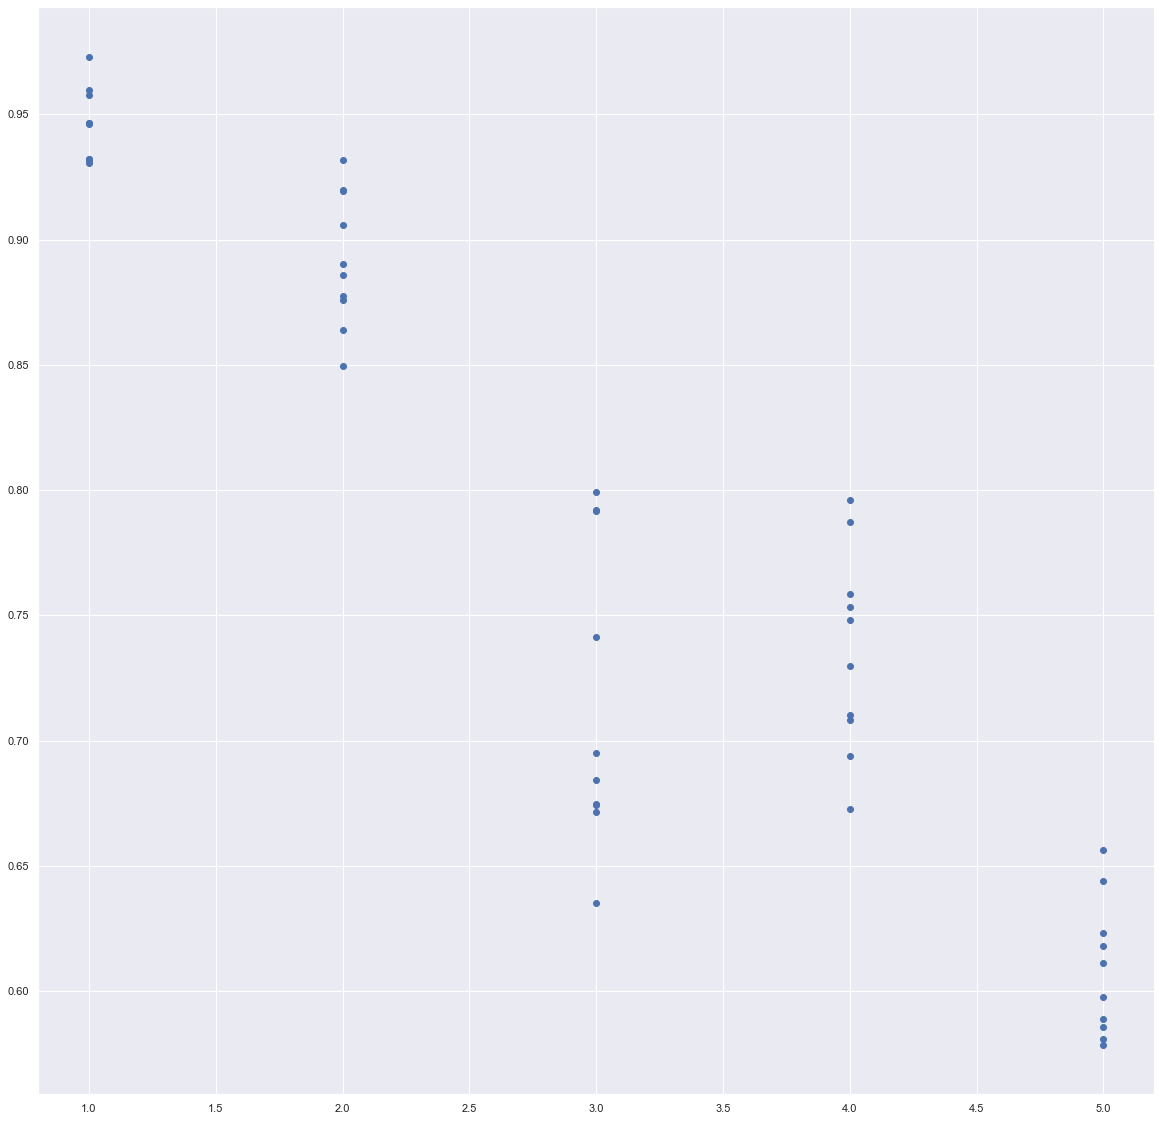

In [68]:
plt.scatter(df_cor.iloc[:,1].values.tolist(), df_cor.iloc[:,0].values.tolist())

In [69]:
from scipy.stats import pearsonr

# Returns Pearson’s correlation coefficient,2-tailed p-value)


# Hypothesis

# H0: ρ = 0

# H1: ρ <> 0


corr, p_value = pearsonr(df_cor.iloc[:,1].values.tolist(), df_cor.iloc[:,0].values.tolist())

alpha = 0.05
  
if p_value<=alpha:

    print('Since p-value(=%f)'%p_value,'<','alpha(=%.2f)'%alpha,'''We reject the null hypothesis H0. So we conclude that there is correlation %.2f at %.2f level of significance.'''%(corr,alpha))

else:

    print('Since p-value(=%f)'%p_value,'>','alpha(=%.2f)'%alpha,'''We do not reject the null hypothesis H0. So we conclude that there is not correlation at %.2f level of significance.''' %alpha)
print(corr)

Since p-value(=0.000000) < alpha(=0.05) We reject the null hypothesis H0. So we conclude that there is correlation -0.92 at 0.05 level of significance.
-0.9191896611055759


In [70]:
#create table
d2 = {
    'Other_Algorithms_initial': f1_results_other_algorithms,
    'Other_Algorithms_noise_1': f1_results_noise_1_other_algorithms,
    'Other_Algorithms_noise_2': f1_results_noise_2_other_algorithms,
    'Other_Algorithms_noise_3': f1_results_noise_3_other_algorithms,
    'Other_Algorithms_noise_4': f1_results_noise_4_other_algorithms
    }
Other_Algorithms_table = pd.DataFrame(d2)
Other_Algorithms_table

,Other_Algorithms_initial,Other_Algorithms_noise_1,Other_Algorithms_noise_2,Other_Algorithms_noise_3,Other_Algorithms_noise_4
0,0.968869,0.941192,0.831001,0.756599,0.606808
1,0.942165,0.909264,0.840556,0.736116,0.621331
2,0.947771,0.929630,0.820625,0.734498,0.646871
3,0.950420,0.912538,0.874178,0.766944,0.575874
4,0.950279,0.928970,0.836108,0.772325,0.659169
5,0.951347,0.908165,0.852567,0.735799,0.593754
6,0.946162,0.928316,0.821615,0.726719,0.587457
7,0.956546,0.910551,0.855020,0.750143,0.626352
8,0.964731,0.955766,0.888403,0.789558,0.653171
9,0.937253,0.879259,0.795207,0.724549,0.564215


In [71]:
# Correlation between f1score of Other algorithms mean value and noise increase 

a = Other_Algorithms_table.iloc[:,:1].squeeze()
     
b = Other_Algorithms_table['Other_Algorithms_noise_1'].squeeze()

c = Other_Algorithms_table['Other_Algorithms_noise_2'].squeeze()
  
d = Other_Algorithms_table['Other_Algorithms_noise_3'].squeeze()    

e = Other_Algorithms_table['Other_Algorithms_noise_4'].squeeze()

f1 = pd.concat([a,b,c,d,e])

f1 = pd.DataFrame(f1)

f1.rename(columns = {0:'f1'}, inplace = True)
f1.reset_index(drop=True, inplace=True)


noise_1 = [1 for i in range(10)]
noise_2 = [2 for i in range(10)]
noise_3 = [3 for i in range(10)]
noise_4 = [4 for i in range(10)]
noise_5 = [5 for i in range(10)]

noise = noise_1+noise_2+noise_3+noise_4+noise_5

noise = pd.DataFrame(noise)

noise.rename(columns = {0:'noise'}, inplace = True)
noise.reset_index(drop=True, inplace=True)


df_cor = pd.concat([f1,noise], axis=1)

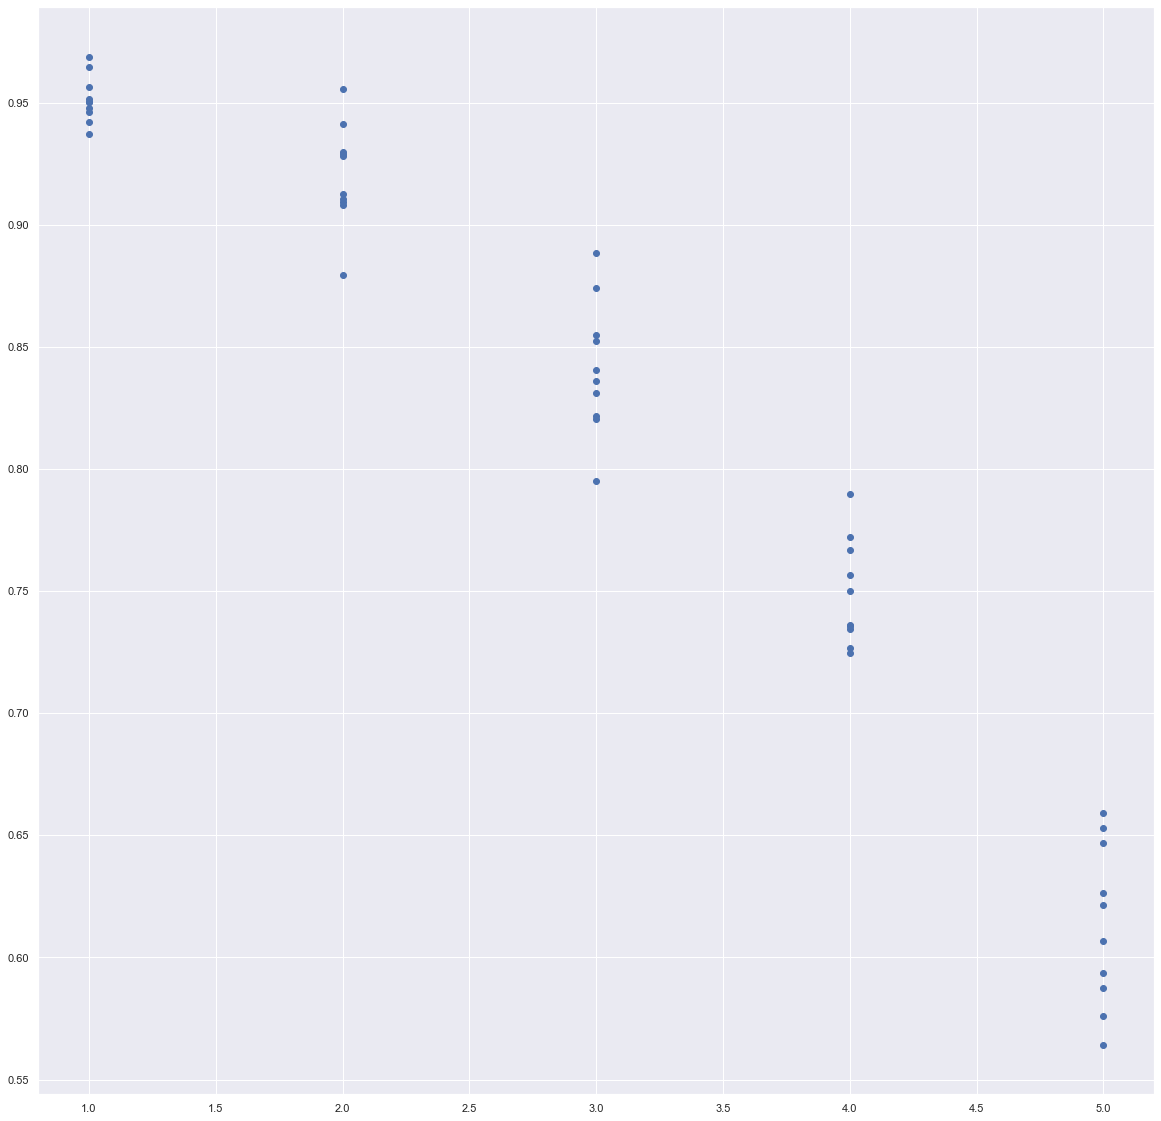

In [72]:
plt.scatter(df_cor.iloc[:,1].values.tolist(), df_cor.iloc[:,0].values.tolist())

In [73]:
from scipy.stats import pearsonr

# Returns Pearson’s correlation coefficient,2-tailed p-value)


# Hypothesis

# H0: ρ = 0

# H1: ρ <> 0


corr, p_value = pearsonr(df_cor.iloc[:,1].values.tolist(), df_cor.iloc[:,0].values.tolist())

alpha = 0.05
  
if p_value<=alpha:

    print('Since p-value(=%f)'%p_value,'<','alpha(=%.2f)'%alpha,'''We reject the null hypothesis H0. So we conclude that there is correlation %.2f at %.2f level of significance.'''%(corr,alpha))

else:

    print('Since p-value(=%f)'%p_value,'>','alpha(=%.2f)'%alpha,'''We do not reject the null hypothesis H0. So we conclude that there is not correlation at %.2f level of significance.''' %alpha)
print(corr)

Since p-value(=0.000000) < alpha(=0.05) We reject the null hypothesis H0. So we conclude that there is correlation -0.96 at 0.05 level of significance.
-0.9595744246749203
